In [26]:
import geopandas as gpd
import matplotlib.pyplot as plt
import plotly.express as px

In [3]:
crash = gpd.read_file('Ped_KSIs_by_CPA.zip')

In [6]:
crash.info(verbose=True, null_counts=True)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 37 entries, 0 to 36
Data columns (total 120 columns):
 #    Column      Non-Null Count  Dtype   
---   ------      --------------  -----   
 0    OBJECTID_1  37 non-null     int64   
 1    CPA_NUM     37 non-null     int64   
 2    NAME_ALF    37 non-null     object  
 3    CASE_ID     37 non-null     object  
 4    ACCIDENT_Y  37 non-null     int64   
 5    PROCDATE    37 non-null     int64   
 6    JURIS       37 non-null     int64   
 7    COLLISION_  37 non-null     int64   
 8    COLLISIO_1  37 non-null     int64   
 9    OFFICER_ID  37 non-null     object  
 10   REPORTING_  37 non-null     object  
 11   DAY_OF_WEE  37 non-null     object  
 12   SHIFT       37 non-null     object  
 13   POPULATION  37 non-null     object  
 14   CNTY_CITY_  37 non-null     object  
 15   SPECIAL_CO  37 non-null     object  
 16   BEAT_TYPE   37 non-null     object  
 17   CHP_BEAT_T  37 non-null     object  
 18   CITY_DIVIS  36 non-nul

/tmp/ipykernel_135/3564954393.py:1: FutureWarning: null_counts is deprecated. Use show_counts instead
  crash.info(verbose=True, null_counts=True)


In [17]:
sub = ['NAME_ALF', 'MilesofHIN', 'geometry']

In [18]:
crash[sub]

NAME_ALF  MilesofHIN  \
0                                           Hollywood   31.730632   
1   Canoga Park - Winnetka - Woodland Hills - West...   16.471004   
2                                  Central City North    3.478841   
3                           Chatsworth - Porter Ranch    2.735820   
4                             Bel Air - Beverly Crest    0.000000   
5                                      Harbor Gateway    0.298722   
6                                            Westlake   15.805587   
7                                          Northridge    7.005908   
8                                 Port of Los Angeles    0.015306   
9                       Brentwood - Pacific Palisades    4.314443   
10                              Northeast Los Angeles   14.038867   
11                                   Encino - Tarzana    7.037046   
12  Sherman Oaks - Studio City - Toluca Lake - Cah...    4.059994   
13               West Adams - Baldwin Hills - Leimert   22.817356   
14  Sunland - Tujunga - Lake View Terrace - Shadow...    2.738290   
15           Silver Lake - Echo Park - Elysian Valley    5.971633   
16                                          San Pedro    7.288435   
17                        Sun Valley - La Tuna Canyon    8.627292   
18                                           Westwood    2.644575   
19                              Southeast Los Angeles   47.543648   
20                                             Sylmar    3.991445   
21                           Wilmington - Harbor City    5.820312   
22                        Palms - Mar Vista - Del Rey    9.567763   
23                                           Wilshire   38.373048   
24                      Van Nuys - North Sherman Oaks   18.858223   
25                                      Boyle Heights    7.523411   
26                          Granada Hills - Knollwood    3.467656   
27        Mission Hills - Panorama City - North Hills   15.184630   
28                   North Hollywood - Valley Village   26.453623   
29                                  South Los Angeles   47.228691   
30                                   Arleta - Pacoima    6.627681   
31                                             Venice    6.237651   
32                             Reseda - West Van Nuys   12.720276   
33                                   West Los Angeles    8.875371   
34                                       Central City   20.672024   
35                        Westchester - Playa del Rey    4.176684   
36                  Los Angeles International Airport    0.617317   

                                             geometry  
0   POLYGON ((-118.30296 34.15854, -118.29884 34.1...  
1   POLYGON ((-118.62900 34.14728, -118.62899 34.1...  
2   POLYGON ((-118.22540 34.07193, -118.22539 34.0...  
3   POLYGON ((-118.57016 34.29536, -118.56872 34.2...  
4   POLYGON ((-118.46661 34.07280, -118.46670 34.0...  
5   POLYGON ((-118.29851 33.81321, -118.30892 33.8...  
6   POLYGON ((-118.27977 34.03789, -118.28411 34.0...  
7   POLYGON ((-118.52810 34.27459, -118.52810 34.2...  
8   MULTIPOLYGON (((-118.23911 33.78008, -118.2414...  
9   POLYGON ((-118.59922 34.07434, -118.57751 34.1...  
10  POLYGON ((-118.22613 34.06218, -118.22606 34.0...  
11  POLYGON ((-118.47405 34.18603, -118.47402 34.1...  
12  POLYGON ((-118.34272 34.11643, -118.34276 34.1...  
13  POLYGON ((-118.31760 34.04718, -118.31761 34.0...  
14  POLYGON ((-118.38741 34.29879, -118.38740 34.2...  
15  POLYGON ((-118.22540 34.07193, -118.22708 34.0...  
16  POLYGON ((-118.26739 33.70366, -118.26745 33.7...  
17  POLYGON ((-118.37115 34.25982, -118.37058 34.2...  
18  POLYGON ((-118.42924 34.07920, -118.42922 34.0...  
19  POLYGON ((-118.23925 34.02465, -118.23934 34.0...  
20  POLYGON ((-118.50725 34.33472, -118.50382 34.3...  
21  MULTIPOLYGON (((-118.29885 33.80661, -118.2990...  
22  MULTIPOLYGON (((-118.43184 34.02911, -118.4300...  
23  POLYGON ((-118.36468 34.04246, -118.36453 34.0...  
24  POLYGON ((-118.466

(-118.69382947728235,
 -118.12972901076266,
 33.671972853206235,
 34.36899380431766)

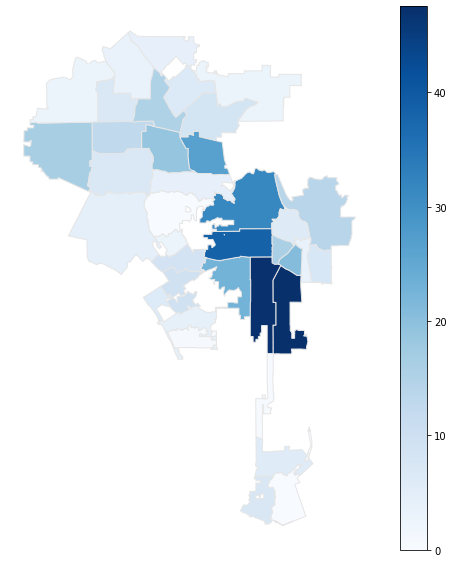

In [31]:
fig, ax = plt.subplots(1, figsize=(10,10))
crash[sub].plot(
    column='MilesofHIN',
    cmap='Blues',
    linewidth=1,
    ax=ax,
    edgecolor='0.9',
    legend = True)
ax.axis('off')

fig = px.choropleth(crash[sub], geojson=crash[sub].geometry, 
                    locations=crash[sub].index,
                    color="MilesofHIN",
                    height=500,
                    color_continuous_scale="Viridis")
fig.update_geos(fitbounds="locations", visible=True)
fig.update_layout(
    title_text='LA City CPA by Miles of High Injury Network'
)
fig.update_layout(
    margin={"r":0,"t":30,"l":10,"b":10},
    coloraxis_colorbar={
        'title':'Miles of HIN'})
fig.show()

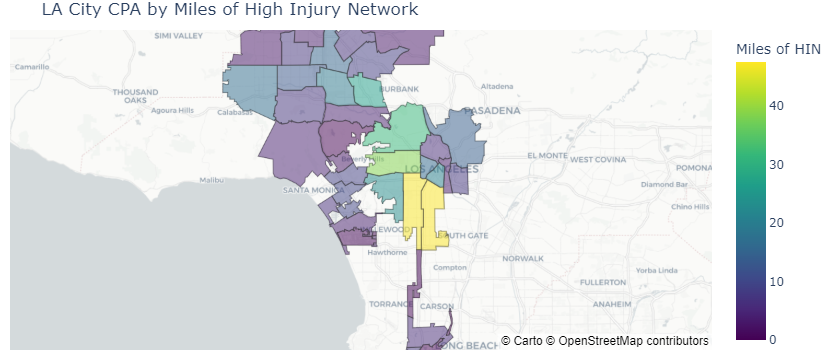

In [54]:
fig = px.choropleth_mapbox(crash[sub], geojson=crash[sub].geometry,
                           locations=crash[sub].index,
                           color='MilesofHIN',
                           color_continuous_scale="Viridis",
                           mapbox_style="carto-positron",
                           zoom=8.5, center = {"lat": 34.01982530237761, "lon": -118.39964683456049},
                           opacity=0.5,
                           labels={'unemp':'unemployment rate'}
                          )
fig.update_layout(
    title_text='LA City CPA by Miles of High Injury Network'
)
fig.update_layout(
    margin={"r":0,"t":30,"l":10,"b":10},
    coloraxis_colorbar={
        'title':'Miles of HIN'})
fig.show()

In [55]:
fig.write_html("milesofhinbycpa.html")